In [1]:
import librosa
import matplotlib.pyplot as plt
import noisereduce as nr
import soundfile as sf
from scipy import signal
import numpy as np
import pywt
from scipy.signal import savgol_filter

In [2]:
# Load an audio file
audio_path = 'SR1.wav'
audio_data, sample_rate = librosa.load(audio_path)

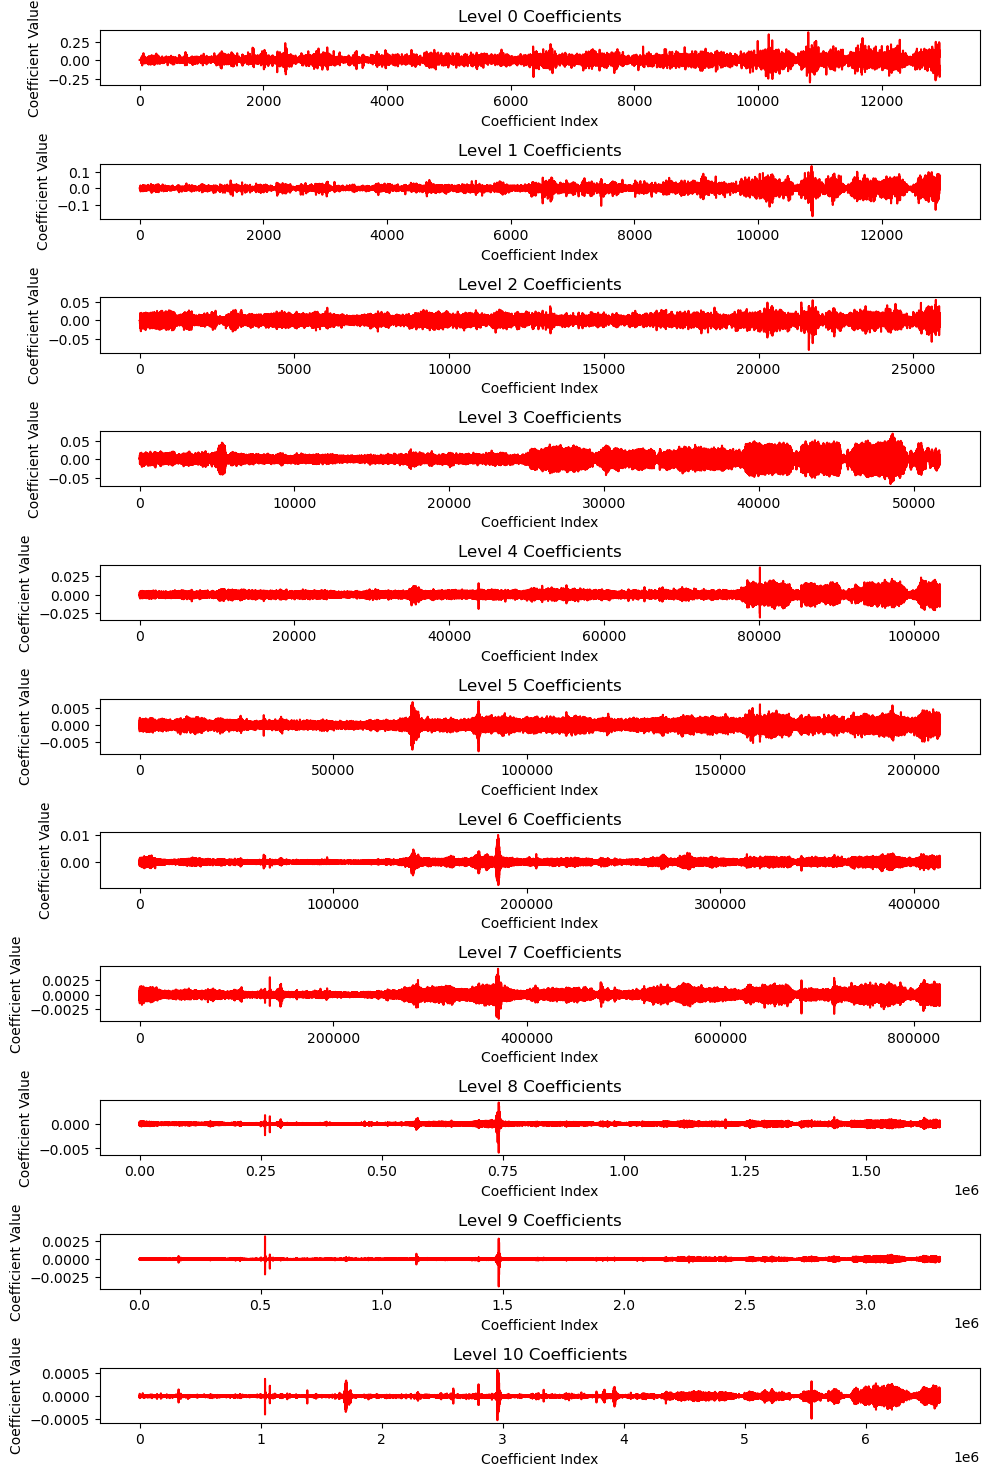

In [3]:
# Define wavelet parameters
wavelet_name = 'db12'  # Choose a wavelet, such as Daubechies 4
level = 10  # Decomposition level

# Perform wavelet transform
coeffs = pywt.wavedec(audio_data, wavelet_name, level=level)

# Plot the wavelet coefficients
plt.figure(figsize=(10, 16))

# Plot wavelet coefficients
for i in range(level):
    plt.subplot(level + 2, 1, i + 2)
    plt.plot(coeffs[i], color='r')
    plt.title(f'Level {i} Coefficients')
    plt.xlabel('Coefficient Index')
    plt.ylabel('Coefficient Value')

# Plot approximation coefficients at the highest level
plt.subplot(level + 2, 1, level + 2)
plt.plot(coeffs[level], color='r')
plt.title(f'Level {level} Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')

plt.tight_layout()
plt.show()

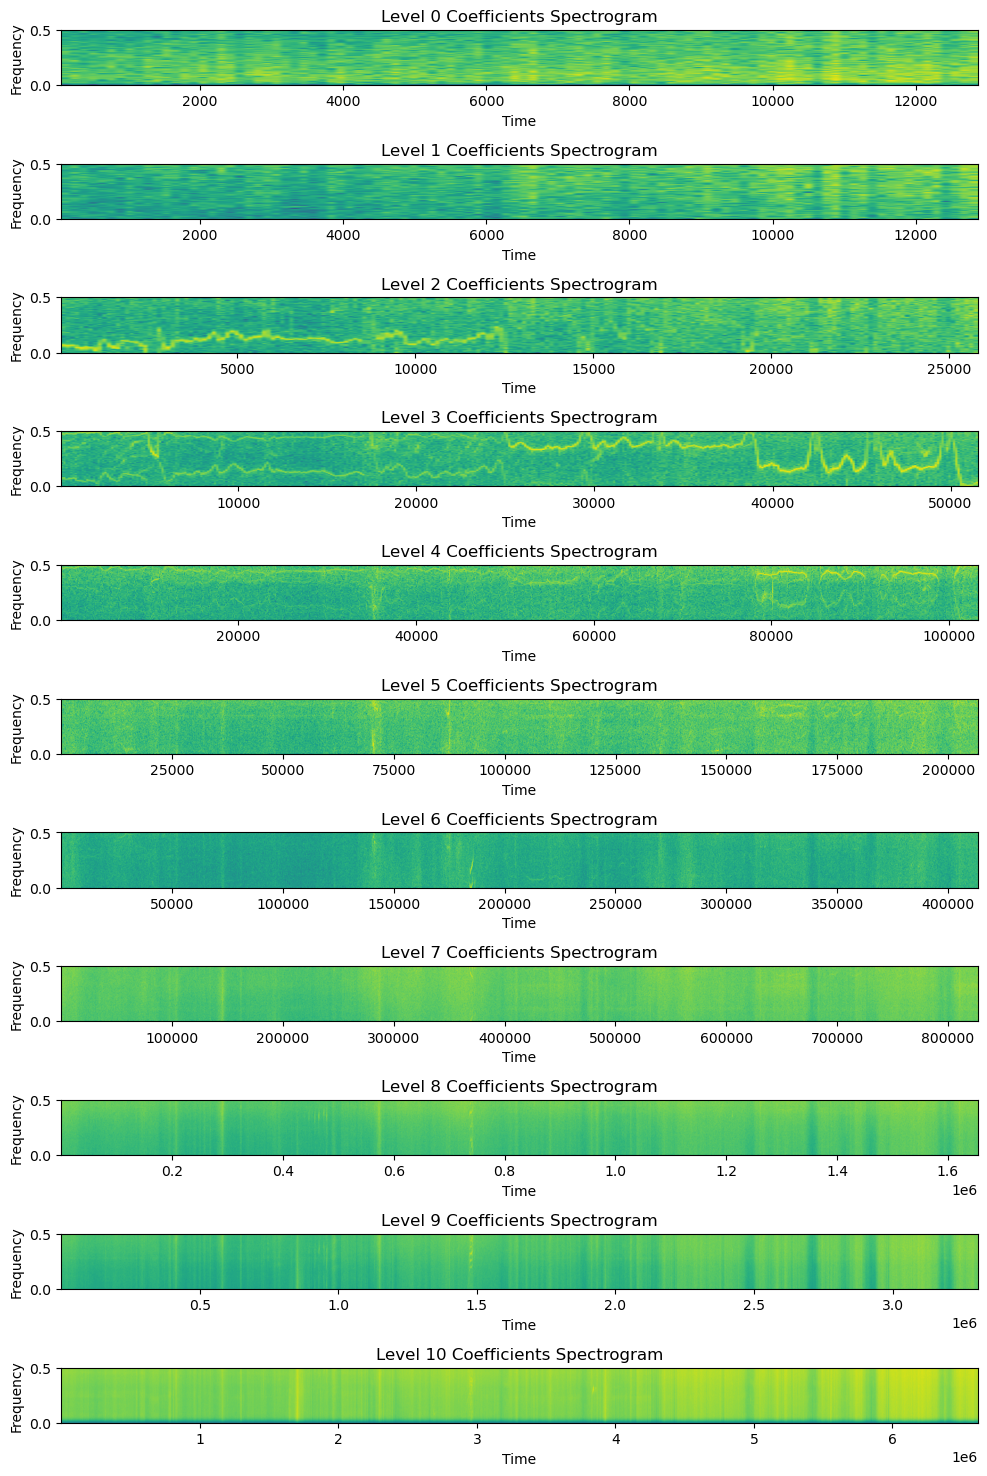

In [4]:
# Plot the spectrogram of wavelet coefficients
plt.figure(figsize=(10, 16))

# Plot spectrogram of wavelet coefficients
for i in range(level):
    plt.subplot(level + 2, 1, i + 2)
    plt.specgram(coeffs[i], Fs=1)
    plt.title(f'Level {i} Coefficients Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

# Plot spectrogram of approximation coefficients at the highest level
plt.subplot(level + 2, 1, level + 2)
plt.specgram(coeffs[level], Fs=1)
plt.title(f'Level {level} Coefficients Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

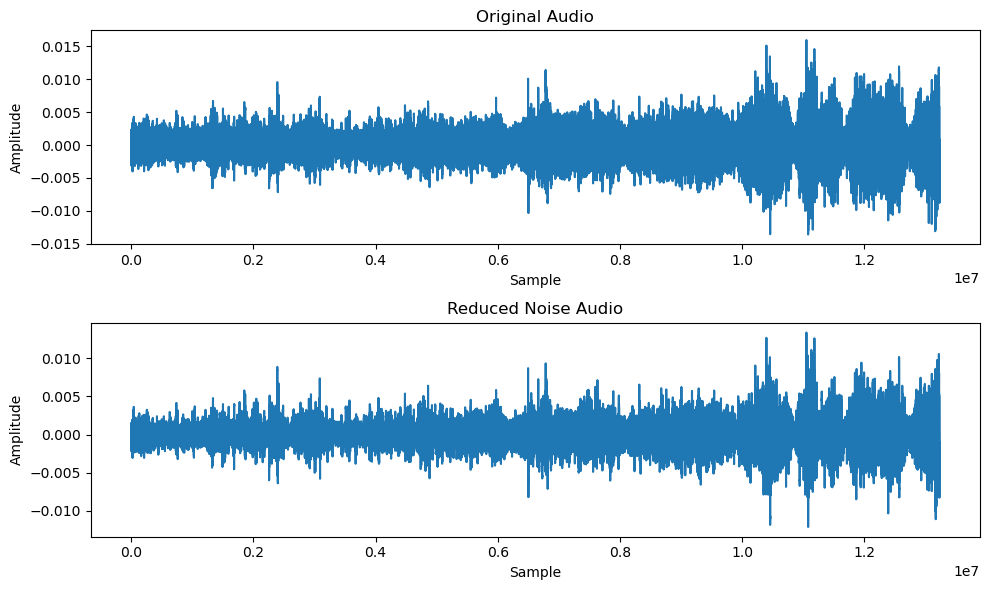

In [5]:
# Apply filtering (attenuate the approximation coefficients)
filtered_coeffs = coeffs[0:2] + [np.zeros_like(coeffs[2])] + [np.zeros_like(coeffs[3])] + [np.zeros_like(coeffs[4])] + coeffs[5:11]

# Reconstruct signal using inverse wavelet transform
reconstructed_signal = pywt.waverec(filtered_coeffs, wavelet_name)

# Plot original and reduced noise data
plt.figure(figsize=(10, 6))

# Plot original audio
plt.subplot(2, 1, 1)
plt.title('Original Audio')
plt.plot(audio_data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot reduced noise audio
plt.subplot(2, 1, 2)
plt.title('Reduced Noise Audio')
plt.plot(reconstructed_signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [152]:
# Save the denoised audio
sf.write('filtered.wav', reconstructed_signal, sample_rate)

In [153]:
# Save the difference audio
difference = audio_data - reconstructed_signal
sf.write('difference.wav', difference, sample_rate)